In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class knapsack:
    def __init__(self,penalty_val = 10):
        self.penalty_val = penalty_val
        self.weights = [9,13,153,50,15,68,27,39,23,52,11,32,24,48,73,42,43,22,7,18,4,30]
        self.value = [150,35,200,160,60,45,60,40,30,10,70,30,15,10,40,70,75,80,20,12,50,10]
        self.ItemName = np.array(['map','compass','water','sandwich','glucose','tin','banana','apple','cheese','beer','santan cream'
                        ,'camera','T-shirt','trousers','umbrella','waterproof trousers','waterproof overclothes','note-case'
                        ,'sunglasses','towel','socks','book'])
    
    def __len__(self):
        return len(self.weights)
    
    def getCost(self,ItemsList):
        self.ItemsList = np.array(ItemsList)
        
        WeightCost = 0 if (400 - self.getWeightCost(ItemsList)) > 0 else (400 - self.getWeightCost(ItemsList))
        ValueCost = self.getValueCost(ItemsList)
        
        return WeightCost * self.penalty_val + ValueCost
        
    def getWeightCost(self,ItemsList):
        return sum([ItemsList[x] * self.weights[x] for x in range(len(ItemsList))])
    
    def getValueCost(self,ItemsList):
        return sum([ItemsList[x] * self.value[x] for x in range(len(ItemsList))])
    
    def printItemAndCost(self,ItemsList):
        print("List of the items: ")
        
        for x in np.where(self.ItemsList == 1):
            
            print(self.ItemName[x])
        
        print("Weight Cost: ",self.getWeightCost(ItemsList))
        print("Value Gain: ",self.getValueCost(ItemsList))
        
        

In [3]:

POPULATION_SIZE = 300
P_CROSSOVER = 0.8
P_MUTATION = 0.3
MAX_GENERATIONS = 200
random.seed(42)

toolbox = base.Toolbox()
knapsack_prob = knapsack()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# create an operator that randomly returns 0 or 1:
toolbox.register("binary", random.randint, 0, 1)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.binary, len(knapsack_prob))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# define the fitness function / objective function
# convert part
def GenerateKnapsac(individual):
    return knapsack_prob.getCost(individual), # return a tuple


toolbox.register("evaluate", GenerateKnapsac)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=4)
# toolbox.register("select", tools.selRoulette)
# toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / len(knapsack_prob))


gen	nevals	min  	avg   
0  	300   	-1758	130.97
1  	273   	-1043	501.957
2  	268   	-780 	586.827
3  	265   	-758 	688.67 
4  	250   	-635 	748.81 
5  	240   	-545 	773.11 
6  	252   	-1023	792.18 
7  	254   	-1068	783.287
8  	254   	-1500	800.65 
9  	271   	-205 	839.973
10 	255   	-720 	837.443
11 	260   	-245 	840.017
12 	263   	-430 	840.54 
13 	254   	-1100	879.063
14 	264   	-210 	927.637
15 	255   	-200 	931.963
16 	265   	-70  	945.9  
17 	270   	80   	953.013
18 	253   	45   	938.947
19 	269   	-705 	942.293
20 	257   	115  	943.777
21 	269   	285  	965.333
22 	264   	-395 	933.01 
23 	261   	-55  	957.777
24 	272   	-243 	942.927
25 	267   	-200 	928.533
26 	274   	-75  	939.717
27 	262   	-40  	959.13 
28 	260   	95   	980.923
29 	270   	-405 	969.15 
30 	258   	-35  	986.727
31 	254   	-260 	965.02 
32 	257   	155  	993.22 
33 	262   	-110 	965.127
34 	260   	-205 	981.397
35 	247   	-255 	957.043
36 	252   	-145 	963.213
37 	242   	-130 	986.92 
38 	259   	-325 	980.657
39

Text(0.5, 1.0, 'Min and Average fitness over')

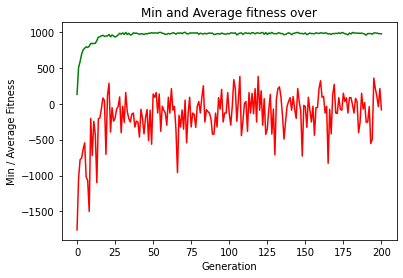

In [4]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)



# define the hall-of-fame object:
HALL_OF_FAME_SIZE = 10
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,
                                          stats=stats, halloffame=hof, verbose=True)

#population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,stats=stats, halloffame=hof, verbose=True)
#print best solution found:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print()
print("-- Details of Item and Cost = ")
knapsack_prob.printItemAndCost(best)

# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

# plot statistics:
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over')

## Full Code

gen	nevals	max  	avg     
0  	300   	-6918	-899.697
1  	273   	-5003	246.223 
2  	268   	-3100	413.37  
3  	265   	-4380	568.393 
4  	250   	-3473	644.99  
5  	240   	-3325	646.417 
6  	252   	-5403	665.137 
7  	254   	-5475	653.853 
8  	254   	-3295	705.87  
9  	271   	-3165	673.133 
10 	255   	-4690	630.713 
11 	260   	-2448	711.49  
12 	263   	-4330	650.647 
13 	254   	-5218	607.92  
14 	264   	-5523	627.243 
15 	255   	-3005	812.037 
16 	265   	-2595	848.6   
17 	270   	-2795	872.663 
18 	253   	-2020	857.923 
19 	269   	-4015	862.22  
20 	257   	-1468	877.013 
21 	269   	-1168	934.307 
22 	264   	-2333	831.63  
23 	261   	-1373	911.81  
24 	272   	-2928	858.423 
25 	267   	-2618	840.333 
26 	274   	-2393	861.483 
27 	262   	-2188	871.203 
28 	260   	-4183	893.693 
29 	270   	-2993	857.817 
30 	258   	-2273	902.807 
31 	254   	-2958	853.213 
32 	257   	-1703	902.93  
33 	262   	-2393	838.007 
34 	260   	-3738	863.537 
35 	247   	-3018	819.69  
36 	252   	-2273	842.053 
37 	242   	-

Text(0.5, 1.0, 'Max and Average fitness over')

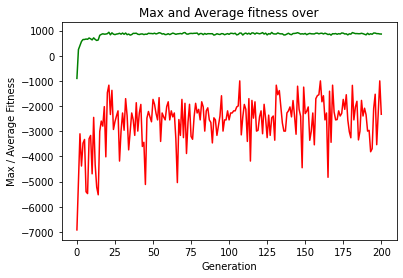

In [3]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


class knapsack:
    def __init__(self,penalty_val = 30):
        self.penalty_val = penalty_val
        self.weights = [9,13,153,50,15,68,27,39,23,52,11,32,24,48,73,42,43,22,7,18,4,30]
        self.value = [150,35,200,160,60,45,60,40,30,10,70,30,15,10,40,70,75,80,20,12,50,10]
        self.ItemName = np.array(['map','compass','water','sandwich','glucose','tin','banana','apple','cheese','beer','santan cream'
                        ,'camera','T-shirt','trousers','umbrella','waterproof trousers','waterproof overclothes','note-case'
                        ,'sunglasses','towel','socks','book'])
    
    def __len__(self):
        return len(self.weights)
    
    def getCost(self,ItemsList):
        self.ItemsList = np.array(ItemsList)
        
        WeightCost = 0 if (400 - self.getWeightCost(ItemsList)) > 0 else (400 - self.getWeightCost(ItemsList))
        ValueCost = self.getValueCost(ItemsList)
        
        return WeightCost * self.penalty_val + ValueCost
        
    def getWeightCost(self,ItemsList):
        return sum([ItemsList[x] * self.weights[x] for x in range(len(ItemsList))])
    
    def getValueCost(self,ItemsList):
        return sum([ItemsList[x] * self.value[x] for x in range(len(ItemsList))])
    
    def printItemAndCost(self,ItemsList):
        print("List of the items: ")
        
        for x in np.where(self.ItemsList == 1):
            
            print(self.ItemName[x])
        
        print("Weight Cost: ",self.getWeightCost(ItemsList))
        print("Value Gain: ",self.getValueCost(ItemsList))
        

POPULATION_SIZE = 300
P_CROSSOVER = 0.8
P_MUTATION = 0.3
MAX_GENERATIONS = 200
random.seed(42)

toolbox = base.Toolbox()
knapsack_prob = knapsack()

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# create an operator that randomly returns 0 or 1:
toolbox.register("binary", random.randint, 0, 1)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.binary, len(knapsack_prob))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# define the fitness function / objective function
def GenerateKnapsac(individual):
    return knapsack_prob.getCost(individual), # return a tuple


toolbox.register("evaluate", GenerateKnapsac)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=4)
# toolbox.register("select", tools.selRoulette)
# toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0 / len(knapsack_prob))

# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.min)
stats.register("avg", np.mean)


# define the hall-of-fame object:
HALL_OF_FAME_SIZE = 10
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,
                                          stats=stats, halloffame=hof, verbose=True)

#population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS,stats=stats, halloffame=hof, verbose=True)
#print best solution found:
best = hof.items[0]
print("-- Best Individual = ", best)
print("-- Best Fitness = ", best.fitness.values[0])
print()
print("-- Schedule = ")
knapsack_prob.printItemAndCost(best)

# extract statistics:
minFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over')